# Preprocessing
#### UD1. Introducción al Machine Learning
#### MP. Sistemas de Aprendizaxe Automáticos
#### IES de Teis (Vigo), Cristina Gómez Alonso

Para limpiar el conjunto de datos, es necesario manejar los valores que faltan y las features categóricas, porque la matemática subyacente en la mayoría de los modelos de Machine Learning asume que los datos son numéricos y no contienen valores desconocidos.
Además, la librería Scikit Learn devuelve un error si se intenta entrenar un modelo como Regresión Lineal o Regresión Logística utilizando datos que contienen valores perdidos o no numéricos.
Es por ello que en este notebook vamos a trabajar con:

* Valores missing
* Datos categóricos
* Escalado y estandarizado

## 1. Valores missing

La falta de datos es quizás el rasgo más común de los datos impuros. Estos valores suelen tomar la forma de NaN o None.

Hay varias maneras de rellenar los valores que faltan:

* Puedes eliminar las líneas con los datos si el conjunto de datos es lo suficientemente grande y el porcentaje de valores perdidos no es alto, más del 50%, por ejemplo.
* Puedes rellenar todas las variables nulas con 0, si se trata de valor numéricos.
* Puedes rellenar los valores perdidos con la media, la mediana o la moda (que es el valor más frecuente de la columna).
* También puedes decidir rellenar los valores que faltan con cualquier valor que venga directamente después en la misma columna.

Estas decisiones dependen del tipo de datos, de lo que se quiera hacer con ellos y de la causa de la falta de valores. En realidad, el hecho de que algo sea popular no significa necesariamente que sea la elección correcta. La estrategia más común es utilizar el valor medio, pero dependiendo de los datos, se puede llegar a un enfoque totalmente diferente.

In [78]:
import pandas as pd
import numpy as np

%matplotlib inline

df_missing=pd.read_csv("data/hepatitis.csv")
df_missing

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,female,True,False,True,True,True,True,False,False,True,True,True,7.6,NaN,242.0,3.3,50.0,True,die
151,44,female,True,False,True,False,False,True,True,False,False,False,False,0.9,126.0,142.0,4.3,NaN,True,live
152,61,female,False,False,True,True,False,False,True,False,True,False,False,0.8,75.0,20.0,4.1,NaN,True,live
153,53,male,False,False,True,False,False,True,False,True,True,False,True,1.5,81.0,19.0,4.1,48.0,True,live


In [79]:
df_missing['anorexia'].value_counts()

False    122
True      32
Name: anorexia, dtype: int64

In [80]:
df_missing.isnull().sum()

age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
class               0
dtype: int64

In [81]:
df_missing.isnull().sum()

age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
class               0
dtype: int64

In [82]:
for c in df_missing.columns:
    miss = df_missing[c].isnull().sum()
    if miss>0:
        print("{} has {} missing value(s)".format(c,miss))
    else:
        print("{} has NO missing value!".format(c))

age has NO missing value!
sex has NO missing value!
steroid has 1 missing value(s)
antivirals has NO missing value!
fatigue has 1 missing value(s)
malaise has 1 missing value(s)
anorexia has 1 missing value(s)
liver_big has 10 missing value(s)
liver_firm has 11 missing value(s)
spleen_palpable has 5 missing value(s)
spiders has 5 missing value(s)
ascites has 5 missing value(s)
varices has 5 missing value(s)
bilirubin has 6 missing value(s)
alk_phosphate has 29 missing value(s)
sgot has 4 missing value(s)
albumin has 16 missing value(s)
protime has 67 missing value(s)
histology has NO missing value!
class has NO missing value!


### Rellenado de valores nulos

In [83]:
df_missing.fillna('FILL')

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,FILL,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,FILL,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,FILL,False,live
3,31,female,FILL,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,FILL,200.0,4.0,FILL,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,female,True,False,True,True,True,True,False,False,True,True,True,7.6,FILL,242.0,3.3,50.0,True,die
151,44,female,True,False,True,False,False,True,True,False,False,False,False,0.9,126.0,142.0,4.3,FILL,True,live
152,61,female,False,False,True,True,False,False,True,False,True,False,False,0.8,75.0,20.0,4.1,FILL,True,live
153,53,male,False,False,True,False,False,True,False,True,True,False,True,1.5,81.0,19.0,4.1,48.0,True,live


In [84]:
df_missing[['bilirubin','alk_phosphate']].fillna('FILL')

,bilirubin,alk_phosphate
0,1.0,85.0
1,0.9,135.0
2,0.7,96.0
3,0.7,46.0
4,1.0,FILL
...,...,...
150,7.6,FILL
151,0.9,126.0
152,0.8,75.0
153,1.5,81.0


In [85]:
df_missing['albumin'].fillna(method='ffill')

0      4.0
1      3.5
2      4.0
3      4.0
4      4.0
      ... 
150    3.3
151    4.3
152    4.1
153    4.1
154    3.1
Name: albumin, Length: 155, dtype: float64

In [86]:
df_missing['albumin']
df_missing['albumin'].fillna(method='bfill')

0      4.0
1      3.5
2      4.0
3      4.0
4      4.0
      ... 
150    3.3
151    4.3
152    4.1
153    4.1
154    3.1
Name: albumin, Length: 155, dtype: float64

In [87]:
df_missing['albumin'].fillna(df_missing['albumin'].mean(), inplace=True)

Busca información sobre el calculador SimpleImputer. ¿Para qué sirve?

In [88]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
df_missing[['protime','sgot']] = imp_mean.fit_transform(df_missing[['protime','sgot']])
df_missing


,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,61.852273,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,61.852273,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,61.852273,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.000000,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,61.852273,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,female,True,False,True,True,True,True,False,False,True,True,True,7.6,NaN,242.0,3.3,50.000000,True,die
151,44,female,True,False,True,False,False,True,True,False,False,False,False,0.9,126.0,142.0,4.3,61.852273,True,live
152,61,female,False,False,True,True,False,False,True,False,True,False,False,0.8,75.0,20.0,4.1,61.852273,True,live
153,53,male,False,False,True,False,False,True,False,True,True,False,True,1.5,81.0,19.0,4.1,48.000000,True,live


In [89]:
#Si quisiéramos aplicar múltiples estrategías, sería necesario utilizar fillna múltiples o ColumnTransformer como composer
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

A = [[7,2,3],[4,np.nan,6],[10,5,np.nan]]

column_trans = ColumnTransformer(
    [('imp_col1', SimpleImputer(strategy='mean'), [1]),
     ('imp_col2', SimpleImputer(strategy='constant', fill_value=29), [2])],
    remainder='passthrough')

print(column_trans.fit_transform(A)[:, [2,0,1]])

[[7 2.0 3]
 [4 3.5 6]
 [10 5.0 29]]


### Borrado de valores nulos

In [90]:
# only drop rows where all columns are NaN
df_missing.dropna(how='all')

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,61.852273,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,61.852273,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,61.852273,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.000000,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,61.852273,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,female,True,False,True,True,True,True,False,False,True,True,True,7.6,NaN,242.0,3.3,50.000000,True,die
151,44,female,True,False,True,False,False,True,True,False,False,False,False,0.9,126.0,142.0,4.3,61.852273,True,live
152,61,female,False,False,True,True,False,False,True,False,True,False,False,0.8,75.0,20.0,4.1,61.852273,True,live
153,53,male,False,False,True,False,False,True,False,True,True,False,True,1.5,81.0,19.0,4.1,48.000000,True,live


In [91]:
# Keep only the rows with at least 15 non-NA values.
df_missing.dropna(thresh=15, inplace=True)
df_missing


,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,61.852273,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,61.852273,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,61.852273,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.000000,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,61.852273,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,female,True,False,True,True,True,True,False,False,True,True,True,7.6,NaN,242.0,3.3,50.000000,True,die
151,44,female,True,False,True,False,False,True,True,False,False,False,False,0.9,126.0,142.0,4.3,61.852273,True,live
152,61,female,False,False,True,True,False,False,True,False,True,False,False,0.8,75.0,20.0,4.1,61.852273,True,live
153,53,male,False,False,True,False,False,True,False,True,True,False,True,1.5,81.0,19.0,4.1,48.000000,True,live


In [92]:
# only drop rows where NaN appear in specific columns (here: 'albumin')
df_missing.dropna(subset=['albumin'])

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,61.852273,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,61.852273,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,61.852273,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.000000,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,61.852273,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,female,True,False,True,True,True,True,False,False,True,True,True,7.6,NaN,242.0,3.3,50.000000,True,die
151,44,female,True,False,True,False,False,True,True,False,False,False,False,0.9,126.0,142.0,4.3,61.852273,True,live
152,61,female,False,False,True,True,False,False,True,False,True,False,False,0.8,75.0,20.0,4.1,61.852273,True,live
153,53,male,False,False,True,False,False,True,False,True,True,False,True,1.5,81.0,19.0,4.1,48.000000,True,live


In [93]:
df_missing.dropna(axis=0) #borra todas las filas que contengan al menos un nulo

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,61.852273,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,61.852273,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,61.852273,False,live
5,34,female,True,False,False,False,False,True,False,False,False,False,False,0.9,95.0,28.0,4.0,75.000000,False,live
10,39,female,False,True,False,False,False,False,True,False,False,False,False,1.3,78.0,30.0,4.4,85.000000,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,36,female,True,False,False,False,False,True,False,False,False,False,False,0.6,120.0,30.0,4.0,61.852273,True,live
151,44,female,True,False,True,False,False,True,True,False,False,False,False,0.9,126.0,142.0,4.3,61.852273,True,live
152,61,female,False,False,True,True,False,False,True,False,True,False,False,0.8,75.0,20.0,4.1,61.852273,True,live
153,53,male,False,False,True,False,False,True,False,True,True,False,True,1.5,81.0,19.0,4.1,48.000000,True,live


In [94]:
df_missing.dropna(axis=1) #borra todas las columnas que contengan al menos un nulo

,age,sex,antivirals,fatigue,malaise,anorexia,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,18.0,4.0,61.852273,False,live
1,50,female,False,True,False,False,42.0,3.5,61.852273,False,live
2,78,female,False,True,False,False,32.0,4.0,61.852273,False,live
3,31,female,True,False,False,False,52.0,4.0,80.000000,False,live
4,34,female,False,False,False,False,200.0,4.0,61.852273,False,live
...,...,...,...,...,...,...,...,...,...,...,...
150,46,female,False,True,True,True,242.0,3.3,50.000000,True,die
151,44,female,False,True,False,False,142.0,4.3,61.852273,True,live
152,61,female,False,True,True,False,20.0,4.1,61.852273,True,live
153,53,male,False,True,False,False,19.0,4.1,48.000000,True,live


In [95]:
df_missing.dropna(axis=1,thresh=10)

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,61.852273,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,61.852273,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,61.852273,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.000000,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,61.852273,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,female,True,False,True,True,True,True,False,False,True,True,True,7.6,NaN,242.0,3.3,50.000000,True,die
151,44,female,True,False,True,False,False,True,True,False,False,False,False,0.9,126.0,142.0,4.3,61.852273,True,live
152,61,female,False,False,True,True,False,False,True,False,True,False,False,0.8,75.0,20.0,4.1,61.852273,True,live
153,53,male,False,False,True,False,False,True,False,True,True,False,True,1.5,81.0,19.0,4.1,48.000000,True,live


## 2. Datos categóricos

En Machine Learning solo utilizamos valores numéricos, tipo de datos flotantes o enteros. Sin embargo, los conjuntos de datos a menudo contienen 'object' como tipo de datos, por lo tanto se hace necesario transformarlo a numérico. En la mayoría de los casos, los valores categóricos son discretos y puedes ser codificados como variables ficticias, asignando un número para cada categoría.
[Tutorial DataCamp super completo](https://www.datacamp.com/community/tutorials/categorical-data)

In [96]:
df = pd.DataFrame([
    ['green', 'M', 10.1, 'class1'],
    ['red', 'L', 13.5, 'class2'],
    ['blue', 'XL', 15.3, 'class1']])
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


### Sustitución de los valores de la columna size por valores numéricos concretos

In [97]:
size_mapping = {'XL': 3, 'L': 2, 'M': 1}
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


### Sustitución de los valores de la columna classlabel con un LabelEncoder

In [98]:
df['classlabel'].unique()

array(['class1', 'class2'], dtype=object)

In [99]:
from sklearn.preprocessing import LabelEncoder
class_label_encoder = LabelEncoder()
    df['classlabel'] = class_label_encoder.fit_transform(df['classlabel'].values)
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


### Sustitución de los valores de la columna color con una columna para cada color

In [100]:
pd.get_dummies(df[['price', 'color', 'size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


Busca más información sobre otras transformaciones de datos categóricos y pon ejemplos sobre este df [Tutorial DataCamp super completo](https://www.datacamp.com/community/tutorials/categorical-data)

## 3. Escalado y estandarizado

[Fuente](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02)
* Escalar generalmente significa cambiar el rango de los valores. La forma de la distribución no cambia. Piensa en cómo un modelo a escala de un edificio tiene las mismas proporciones que el original, solo que más pequeño. Por eso decimos que está dibujado a escala. El rango a menudo se establece en 0 a 1.
* Estandarizar generalmente significa cambiar los valores para que la desviación estándar de la distribución sea igual a uno. El escalado a menudo está implícito.
* Normalizar se puede usar para referirse a cualquiera de las cosas anteriores (¡y más!). Os sugiero que evitéis el término normalizar, porque tiene muchas definiciones y es propenso a crear confusión. Habitualmente, normalizar daría como resultado unos valores en el rango (-1,1)

In [101]:
import pandas as pd

df_wine = pd.read_csv('data/wine.data.csv')
le = LabelEncoder()
df_wine['Class'] = le.fit_transform(df_wine['Class'].values)
df_wine

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


In [102]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, :-1].values, df_wine.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
len(X_test), len(X_train)

(54, 124)

### MinMaxScaler

Para cada valor de una función, MinMaxScaler resta el valor mínimo de la función y luego lo divide por el rango. El rango es la diferencia entre el máximo original y el mínimo original.
MinMaxScaler conserva la forma de la distribución original. No cambia significativamente la información incrustada en los datos originales.
Ten en cuenta que MinMaxScaler no reduce la importancia de los valores atípicos (o outlayers).
El rango predeterminado para la función devuelta por MinMaxScaler es de 0 a 1.

In [103]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [104]:
X_train_norm


array([[0.72043011, 0.20378151, 0.53763441, ..., 0.48717949, 1.        ,
        0.5854251 ],
       [0.31989247, 0.08403361, 0.31182796, ..., 0.27350427, 0.64102564,
        0.        ],
       [0.60215054, 0.71218487, 0.48387097, ..., 0.04273504, 0.10622711,
        0.42348178],
       ...,
       [0.37365591, 0.1512605 , 0.44623656, ..., 0.44444444, 0.61904762,
        0.02672065],
       [0.77150538, 0.16596639, 0.40860215, ..., 0.31623932, 0.75457875,
        0.54493927],
       [0.84139785, 0.34033613, 0.60215054, ..., 0.06837607, 0.16117216,
        0.28178138]])

In [105]:
X_test_norm

array([[ 0.72849462,  0.16386555,  0.47849462,  0.29896907,  0.52173913,
         0.53956835,  0.74311927,  0.13461538,  0.37974684,  0.4364852 ,
         0.32478632,  0.70695971,  0.60566802],
       [ 0.47311828,  0.37394958,  0.60215054,  0.58762887,  0.45652174,
         0.13669065,  0.27217125,  0.19230769,  0.26582278,  0.90926457,
        -0.05128205,  0.07326007,  0.13603239],
       [ 0.36021505,  0.05042017,  0.43010753,  0.43298969,  0.18478261,
         0.86330935,  0.80428135,  0.09615385,  0.45886076,  0.30276982,
         0.58119658,  0.58608059,  0.08744939],
       [ 0.68010753,  0.17647059,  0.59139785,  0.51030928,  0.5       ,
         0.66906475,  0.70642202,  0.11538462,  0.64240506,  0.47468959,
         0.37606838,  0.64468864,  0.65425101],
       [ 0.54301075,  1.03151261,  0.41397849,  0.56185567,  0.17391304,
         0.54676259,  0.66666667,  0.30769231,  0.50316456,  0.1260745 ,
         0.16239316,  0.67032967,  0.05506073],
       [ 0.14247312,  0.243697

In [106]:
X_train_norm[0]

array([0.72043011, 0.20378151, 0.53763441, 0.30927835, 0.33695652,
       0.54316547, 0.73700306, 0.25      , 0.40189873, 0.24068768,
       0.48717949, 1.        , 0.5854251 ])

Observa cómo las características están todas en la misma escala relativa. Se han mantenido los espacios relativos entre los valores de cada característica.
MinMaxScaler no es un mal escalador para empezar, a menos que sepa que desee que su función tenga una distribución normal o que tenga valores atípicos y desee que tengan una influencia reducida.

### StandardScaler

StandardScaler estandariza una característica restando la media y luego escalando a la varianza de la unidad. La varianza unitaria significa dividir todos los valores por la desviación estándar. StandardScaler da como resultado una distribución con una desviación estándar igual a 1. La varianza también es igual a 1, porque varianza = desviación estándar al cuadrado. Y 1 al cuadrado = 1.
StandardScaler hace que la media de la distribución sea aproximadamente 0.
Los algoritmos de aprendizaje profundo a menudo requieren media cero y varianza unitaria. Los algoritmos de tipo regresión también se benefician de datos normalmente distribuidos con muestras de pequeño tamaño.
[Link](https://interactivechaos.com/es/manual/tutorial-de-machine-learning/standard-scaler)

In [107]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [108]:
X_train_std

array([[ 0.91083058, -0.46259897, -0.01142613, ...,  0.65706596,
         1.94354495,  0.93700997],
       [-0.95609928, -0.96608672, -1.53725357, ..., -0.40859506,
         0.58118003, -1.41336684],
       [ 0.35952243,  1.67501572, -0.37471838, ..., -1.55950896,
        -1.44846566,  0.28683658],
       ...,
       [-0.70550467, -0.68342693, -0.62902295, ...,  0.44393375,
         0.49776993, -1.30608823],
       [ 1.14889546, -0.6215951 , -0.88332752, ..., -0.19546286,
         1.0121322 ,  0.77446662],
       [ 1.47466845,  0.11155374,  0.42452457, ..., -1.43162964,
        -1.23994042, -0.28206514]])

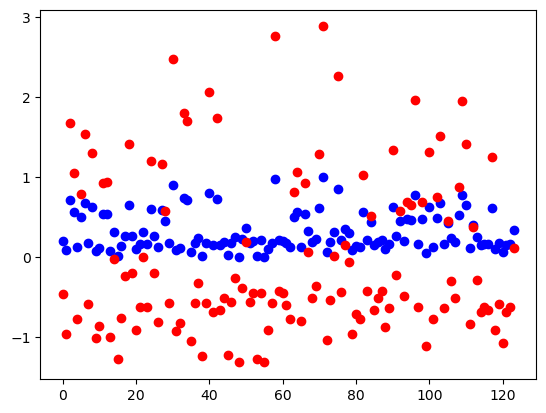

In [109]:
from matplotlib.pyplot import scatter

xx = np.arange(len(X_train_std))
yy1 = X_train_norm[:,1]
yy2 = X_train_std[:,1]
scatter(xx, yy1, color='b')
scatter(xx, yy2, color='r')

In [110]:
import pandas as pd
data = [5,10,15,100]
df = pd.DataFrame(data, columns=['Numbers'])

scaler1 = StandardScaler()
df_standard = scaler1.fit_transform(df)

scaler2 = MinMaxScaler()
df_minmax = scaler2.fit_transform(df)

df['StandardScaler'] = df_standard
df['MinMaxScaler'] = df_minmax

df


,Numbers,StandardScaler,MinMaxScaler
0,5,-0.702764,0.000000
1,10,-0.574989,0.052632
2,15,-0.447214,0.105263
3,100,1.724967,1.000000


## Ejercicio

Carga el dataset sample sample_data.csv que tienes en el directorio data.
1. Consulta cuántos valores nulos tiene el dataset y en qué columnas.
2. Borra las filas que tengan valores nulos en las columnas Country y Purchased.
3. Sustituye los valores nulos de las columnas Age y Salary por la media.
4. Transforma la columna Country con un OneHotEncoder.
5. Transforma la columna Purchased con un LabelEncoder.
6. Divide el dataset en 4 grupos (training y testing).
7. Escala las columnas Age y Salary con un StandardScaler.

In [12]:
#0
import pandas as pd
df2 = pd.read_csv('data/sample_data.csv')
#1
df2.isnull().sum()
df2.info()
#2
df2.dropna(subset=['Country','Purchased'],inplace=True)

#3
df2['Age'].fillna(df2['Age'].mean(), inplace=True)
df2['Salary'].fillna(df2['Salary'].mean(), inplace=True)

#4
#Solución con get_dummies
df= pd.get_dummies(df2, columns=['Country'])

#Solución con OneHotEncoder, pero que no funciona
#from sklearn.preprocessing import OneHotEncoder
#ohe = OneHotEncoder()
#ohe.fit_transform(df2[:,0:1]).toarray()
#df2

#Solución con OneHotEncoder dentro de un ColumnTransformer, que sí funciona, pero se pierden los nombres de las columnas
#from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import OneHotEncoder

#ct = ColumnTransformer(transformers=[('Country', OneHotEncoder(), [0])],remainder='passthrough')
#df2 = ct.fit_transform(df2)
#print(ct.get_feature_names_out())
#df2

#5
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2['Purchased'] = le.fit_transform(df2['Purchased'])
df2


#6
from sklearn.model_selection import train_test_split
X, y = df2.iloc[:, :-1], df2.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
#X_train e X_test son dataframes mientras que y_train e y_test son arrays numpy
print(X_train.shape, X_test.shape)
print(X_test)

#7
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['Age', 'Salary']] = scaler.fit_transform(X_train[['Age','Salary']].values)
X_test[['Age', 'Salary']] = scaler.transform(X_test[['Age','Salary']].values)
X_train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    28 non-null     object 
 1   Age        27 non-null     float64
 2   Salary     28 non-null     float64
 3   Purchased  28 non-null     object 
dtypes: float64(2), object(2)
memory usage: 1.0+ KB
(20, 3) (7, 3)
    Country   Age        Salary
2   Germany  30.0  54000.000000
26   France  37.0  67000.000000
16    Spain  34.0  44000.000000
19  Nigeria  29.0  77000.000000
5   Germany  40.0  53038.461538
11  Nigeria  50.0  60000.000000
25  Germany  45.0  50000.000000


,Country,Age,Salary
15,Nigeria,-0.079240,-0.409231
21,France,0.978856,-0.164183
22,Germany,1.684253,1.551158
18,Spain,-0.314372,-0.164183
1,Spain,-1.019769,-0.164183
10,France,0.155893,0.767003
28,Nigeria,-0.784636,-1.781504
27,Nigeria,-0.667070,-1.046358
8,France,1.449120,1.355119
6,France,-0.079240,0.325915


# Webgrafia


[Web Bogotobogo](https://www.bogotobogo.com/python/scikit-learn/scikit_machine_learning_Data_Preprocessing-Missing-Data-Categorical-Data.php)
[Tutorial DataCamp sobre Categorical Data](https://www.datacamp.com/community/tutorials/categorical-data)
[Curso de Tirtjakupto Sarkar](https://github.com/tirthajyoti/Machine-Learning-with-Python)
[DataCamp](https://www.datacamp.com/)
[Aprende IA](https://aprendeia.com/limpieza-y-procesamiento-de-datos-con-codigo-en-python/)


# Licencia

[Attributon-ShacerAlike 4.0 International](https://creativecommons.org/licenses/by-sa/4.0/)

Puedes utilizar libremente este material, con las siguientes condiciones:

* Atribuir la autoría a este documento.
* Si lo utilizas y haces cambios, deberás liberarlo también bajo la misma licencia.